In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
cat_directory = 'E:\\seismic wave detection\\space_apps_2024_seismic_detection\\data\\lunar\\training\\catalogs\\'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)

In [3]:
cat

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19T20:25:00.000000,73500.0,evid00002,impact_mq
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25T03:32:00.000000,12720.0,evid00003,impact_mq
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26T20:17:00.000000,73020.0,evid00004,impact_mq
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25T01:14:00.000000,4440.0,evid00006,impact_mq
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26T14:29:00.000000,52140.0,evid00007,deep_mq
...,...,...,...,...,...
71,xa.s12.00.mhz.1974-10-14HR00_evid00156,1974-10-14T17:43:00.000000,63780.0,evid00156,impact_mq
72,xa.s12.00.mhz.1975-04-12HR00_evid00191,1975-04-12T18:15:00.000000,65700.0,evid00191,impact_mq
73,xa.s12.00.mhz.1975-05-04HR00_evid00192,1975-05-04T10:05:00.000000,36300.0,evid00192,impact_mq
74,xa.s12.00.mhz.1975-06-24HR00_evid00196,1975-06-24T16:03:00.000000,57780.0,evid00196,impact_mq


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

row = cat.iloc[9]  # Example: selecting the 10th event
arrival_time = datetime.strptime(row['time_abs(%Y-%m-%dT%H:%M:%S.%f)'], '%Y-%m-%dT%H:%M:%S.%f')
test_filename = row['filename']

data_directory = 'E:\\seismic wave detection\\space_apps_2024_seismic_detection\\data\\lunar\\training\\data\\S12_GradeA/'
csv_file = f'{data_directory}{test_filename}.csv'
data_cat = pd.read_csv(csv_file)

In [5]:
data_cat

,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s)
0,1970-09-26T00:00:00.149000,0.000000,-1.743354e-16
1,1970-09-26T00:00:00.299943,0.150943,-1.810003e-16
2,1970-09-26T00:00:00.450887,0.301887,-1.614842e-16
3,1970-09-26T00:00:00.601830,0.452830,-1.344812e-16
4,1970-09-26T00:00:00.752774,0.603774,-1.187775e-16
...,...,...,...
572418,1970-09-27T00:00:02.865981,86402.716981,3.001847e-16
572419,1970-09-27T00:00:03.016925,86402.867925,1.829159e-16
572420,1970-09-27T00:00:03.167868,86403.018868,1.438250e-16
572421,1970-09-27T00:00:03.318811,86403.169811,1.788944e-16


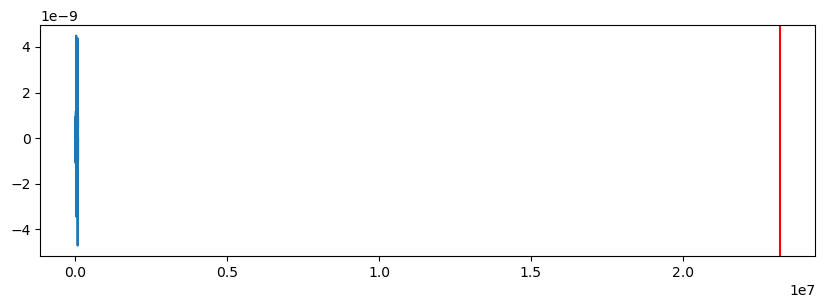

In [6]:
csv_times = np.array(data_cat['time_rel(sec)'])
csv_data = np.array(data_cat['velocity(m/s)'])
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(csv_times, csv_data)
ax.axvline(x=arrival_time.timestamp(), color='red', label='Arrival Time')
plt.show()

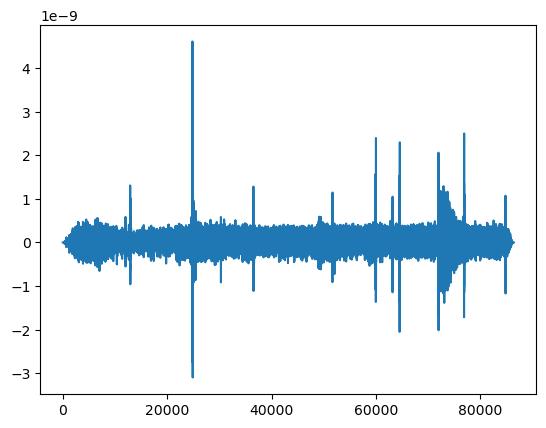

In [7]:
from obspy.signal.filter import bandpass

st_filt = bandpass(data=csv_data, freqmin=0.01, freqmax=0.5, df=6.625)  # Apply filter
plt.plot(csv_times, st_filt)
plt.show()


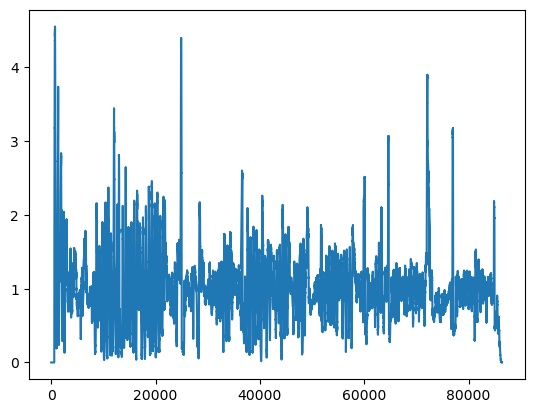

In [8]:
from obspy.signal.trigger import classic_sta_lta

sta_len = 120  # Short-term window in seconds
lta_len = 600  # Long-term window in seconds
df = 6.625  # Sampling rate

# Run STA/LTA
cft = classic_sta_lta(csv_data, int(sta_len * df), int(lta_len * df))

# Plot
plt.plot(csv_times, cft)
plt.show()

In [9]:
data_cat

,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s)
0,1970-09-26T00:00:00.149000,0.000000,-1.743354e-16
1,1970-09-26T00:00:00.299943,0.150943,-1.810003e-16
2,1970-09-26T00:00:00.450887,0.301887,-1.614842e-16
3,1970-09-26T00:00:00.601830,0.452830,-1.344812e-16
4,1970-09-26T00:00:00.752774,0.603774,-1.187775e-16
...,...,...,...
572418,1970-09-27T00:00:02.865981,86402.716981,3.001847e-16
572419,1970-09-27T00:00:03.016925,86402.867925,1.829159e-16
572420,1970-09-27T00:00:03.167868,86403.018868,1.438250e-16
572421,1970-09-27T00:00:03.318811,86403.169811,1.788944e-16


In [10]:
csv_times

array([0.00000000e+00, 1.50943396e-01, 3.01886792e-01, ...,
       8.64030189e+04, 8.64031698e+04, 8.64033208e+04])

In [22]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from obspy.signal.trigger import classic_sta_lta

# Directory where catalog data files are stored

# Function to preprocess the seismic data
def preprocess_data(file_path):
    # Read the seismic data from the CSV file
    data = pd.read_csv(file_path)
    
    # Example: assume there is a column 'seismic_data' which contains the seismic signals
    # Applying STA/LTA trigger (you can adjust window sizes based on your data)
    data['sta_lta'] = classic_sta_lta(data['seismic_column'], short_window=5, long_window=20)
    
    # Further preprocessing (if required) - e.g., normalization or removing unwanted columns
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data.drop('seismic_column', axis=1))  # Assuming 'seismic_column' needs to be scaled

    return pd.DataFrame(data_scaled)

# Function to iterate over catalog files and run ML model
def process_and_train_model(cat_directory):
    for catalog_file in os.listdir(catalog_dir):
        if catalog_file.endswith('.csv'):  # Check if the file is a CSV
            file_path = os.path.join(cat_directory, cat_file)
            print(f"Processing file: {cat_file}")
            
            # Preprocess the data from the file
            processed_data = preprocess_data(file_path)
            
            # Assuming 'X' is features and 'y' is the target column for ML
            # Modify 'target_column' based on your actual column name
            X = processed_data.drop('target_column', axis=1)
            y = processed_data['target_column']
            
            # Split the dataset into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
            
            # Train a RandomForest model (or any ML model of your choice)
            model = RandomForestClassifier()
            model.fit(X_train, y_train)
            
            # Evaluate the model
            accuracy = model.score(X_test, y_test)
            print(f'Accuracy for {cat_file}: {accuracy}')

# Run the function on your catalog folder
process_and_train_model(cat_directory)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/path/to/your/catalog/files/'